# ISLR ex.14 (colinearity problem)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

#3.a) What are the regression coefficients?

**Ans** regression coefficient: $β_{0} = 2, β_{1} = 2, β_{2} = 0.3$

In [ ]:
np.random.seed(1)
x1 = np.random.uniform(size = 100)
x1 = x1.reshape(100,1)
x2 = 0.5*x1 + np.random.normal(size = 100).reshape(100,1) /10
y = 2 + 2*x1 + 0.3*x2  + np.random.normal(size = 100).reshape(100,1)
x = np.concatenate((x1,x2), axis=1)

In [ ]:
x1.shape, x2.shape, y.shape, x.shape

((100, 1), (100, 1), (100, 1), (100, 2))

# 3.b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.


**Ans** Correlation coefficient between x1 and x2 is 0.8390596222844917

b.) correlation coefficient between x1 and x2 is 0.8390596222844917


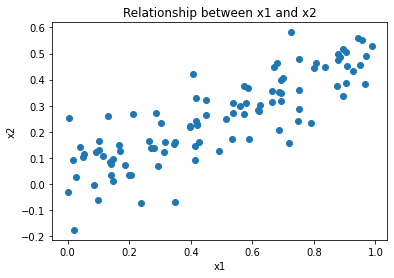

In [ ]:
cor = np.corrcoef(x.T)
plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Relationship between x1 and x2')
print('b.) correlation coefficient between x1 and x2 is', cor[0,1])

#3.c) Using this data, fit a least squares regression. Describe the results obtained.

**Ans**   Regression Coefficient:
$\hat{β_{0}} = 2.1893, \hat{β_{1}} = 0.7046, \hat{β_{2}} = 2.5024$

ค่า $\hat{β}$ ที่ได้ควรจะได้ผลลัพธ์ใกล้เคียงกับค่า ${β}$ จริงแต่ผลลัพธ์ที่ออกมานั้นไม่เป็นอย่างที่คาดหวังไว้ เนื่องจากการสร้าง $x_{1}$ สุ่มหยิบจาก uniform distribution ที่อยู่ระหว่าง 0 ถึง 1 และค่า $x_{2}$ ก็ถูกสร้างมาจาก x1 อีกที ในส่วนของ $y$ จะเกิดจาก linear combination ของ $x_{1}$ และ $x_{2}$ รวมกับผลของสัญญาณรบกวน ซึ่งสัญญาณรบกวนนี้จะถูกสุ่มมามจากการกระจายตัวแบบ Normal distribution ซึ่งค่าส่วนใหญ่จะอยู่ระหว่าง (-3,3) ดังนั้นการที่ผลลัพธ์ในการประมาณ $\hat{β}$ ไม่เป็นไปอย่างที่คาดหวัง อาจเป็นเพราะการที่ amplitude ของสัญญาณรบกวนมีค่ามากเกินไป


* If p ≤ .05 → “significant”


สำหรับ null hypothesis $H_{0} : β_{1} = 0$ จะพบว่าค่า p-value มีค่าสูงเกินกว่า 0.05 นั่นหมายความว่าค่า x1 จะไม่มีความสัมพันธ์กับ output y 

สำหรับ null hypothesis $H_{0} : β_{2} = 0$ จะพบว่าค่า p-value มีค่าสูงต่ำกว่า 0.05 นั่นหมายความว่าค่า x2 จะมีความสัมพันธ์กับ output y

In [ ]:
x_constant = sm.add_constant(x)
model_1 = sm.OLS(y,x_constant)
results_1 = model_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           4.40e-07
Time:                        02:39:16   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.0

In [ ]:
regress_coef1 = results_1.params
print(regress_coef1)

[2.1892844  0.70462854 2.50240496]


#3.d) Fit a least squares regression to predict y using only x1. Comment on your results.

**Ans** null hypothesis $H_{0} : β_{1} = 0$ จะพบว่าค่า p-value มีค่าสูงต่ำกว่า 0.05 นั่นหมายความว่าค่า x1 จะมีความสัมพันธ์กับ output y 



In [ ]:
x1_constant = sm.add_constant(x1)
model_2 = sm.OLS(y,x1_constant)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           6.68e-07
Time:                        02:39:16   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.0

#3.e) Fit a least squares regression to predict y using only x2. Comment on your results.

**Ans** null hypothesis $H_{0} : β_{2} = 0$ จะพบว่าค่า p-value มีค่าสูงต่ำกว่า 0.05 นั่นหมายความว่าค่า x2 จะมีความสัมพันธ์กับ output y 

In [ ]:
x2_constant = sm.add_constant(x2)
model_3 = sm.OLS(y,x2_constant)
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.09e-07
Time:                        02:39:16   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.0

#3.f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

**Ans** จากผลลัพธ์ของ c.), d.), e.) จะมีความขัดแย้งกัน ซึ่งสามารถสรุปได้ว่า ในกรณีที่ใช้ตัวแปร x1 และ x2 ในการประมาณค่า y จะพบว่า ตัวแปร x1 นั้นไม่มีความสัมพันธ์กับ y แต่ในกรณีที่ใช้ทีละ 1 ตัวแปรในการประมาณค่า y จะพบว่าทั้งตัวแปร x1 และ x2 มีความสัมพันธ์ต่อค่า y ทั้งสองกรณี ซึ่งจากสมการก็จะเห็นว่าทั้งตัวแปร x1,x2 มีความสัมพันธ์กับค่า y

ทั้งนี้เนื่องจาก ค่า correlation ของ x1 และ x2 มีค่า 0.839 ซึ่งมีค่าสูงทำให้แสดงถึง trend ของ x1 และ x2 เป็นไปตามกัน จึงสามารถสรุปได้ว่าเมื่อใช้ตัวแปรที่มี correlation ระหว่างตัวแปรสูงจะทำให้ เมื่อประมาณ y โดยใช้สองตัวแปรนี้จะทำให้ตัวแปรตัวใดตัวหนึ่งไม่ส่งผลต่อการประมาณ y



#3.g) Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models?

**Ans** จากการเพิ่มข้อมูลมา 1 จุดจะส่งผลต่อ regression coefficient โดยค่า regression coefficient จะเปลี่ยนเพื่อให้เกิด error น้อยที่สุด ซึ่งเมื่อ plot กราฟออกมาจะพบว่า ในกรณีที่มีตัวแปร x1, x2  hyperplane จะพยายามปรับให้เข้าใกล้กับข้อมูลที่ถูกเพิ่มเข้ามา และในกรณีที่ใช้ตัวแปรเดียวในการ fit ข้อมูลก็จะเห็นผลลัพธ์แบบเดียวกัน โดยสามารถดูได้จาก Fig.1, Fig.2, Fig.3 ตามลำดับ และจาก studentized residual ($t_{i}$) ของจุดที่เพิ่มมานั้นมีค่าน้อยกว่า 3 จึงสรุปได้ว่าจุดที่ถูกเพิ่มมานั้นไม่เป็น outliers นอกจากนี้เมื่อพิจารณาว่าจุดที่ถูกเพิ่มมานั้นเป็น high-leverage point หรือไม่จะดูที่ค่า hat matrix ($h_{ii}$) ซึ่งค่า $h_{101} = 0.409$ ซึ่งมากกว่าค่า threshold($2*\frac{n}{N}$) ดังนั้นจุดที่เพิ่มมาใหม่นี้เป็นจุด high leverage

In [ ]:
c = np.array([[0.1, 0.8]])
x_new = np.concatenate((x,c), axis = 0)
y_new = np.concatenate((y,np.array([[6]])), axis = 0)
x_new.shape, y_new.shape

((101, 2), (101, 1))

In [ ]:
x_new[-1,:], y_new[-1,:]

(array([0.1, 0.8]), array([6.]))

In [ ]:
x_new.shape, y_new.shape

((101, 2), (101, 1))

In [ ]:
x_new_cons = sm.add_constant(x_new)
model_new = sm.OLS(y_new, x_new_cons)
results_new  = model_new.fit()
print(results_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           5.51e-08
Time:                        02:39:16   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1996      0.199     11.041      0.0

In [ ]:
x_new1_cons = sm.add_constant(x_new[:,0])
model_new1 = sm.OLS(y_new, x_new1_cons)
results_new1  = model_new1.fit()
print(results_new1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           9.15e-06
Time:                        02:39:17   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3583      0.208     11.331      0.0

In [ ]:
x_new2_cons = sm.add_constant(x_new[:,1])
model_new2 = sm.OLS(y_new, x_new2_cons)
results_new2  = model_new2.fit()
print(results_new2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           7.41e-09
Time:                        02:39:17   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2331      0.182     12.271      0.0

In [ ]:
list(regress_coef1)

[2.189284397624821, 0.7046285363120234, 2.502404958673055]

In [ ]:
regress_coef1 = list(results_1.params)
regress_coef2 = list(results_2.params)
regress_coef2.append('-')
regress_coef3 = list(results_3.params)
regress_coef3.insert(1,'-')
regress_coef_new = list(results_new.params)
regress_coef_new1 = list(results_new1.params)
regress_coef_new1.append('-')
regress_coef_new2 = list(results_new2.params)
regress_coef_new2.insert(1,'-')
params = {'model1':regress_coef1, 'model2':regress_coef2, 'model3':regress_coef3, 'model4':regress_coef_new, 'model5':regress_coef_new1, 'model6':regress_coef_new2}
df_params = pd.DataFrame(params)
index = ['\u03B2_{0}', '\u03B2_{1}', '\u03B2_{2}']
df_params.index = index
df_params

,model1,model2,model3,model4,model5,model6
β_{0},2.189284,2.248581,2.265526,2.199575,2.358326,2.233127
β_{1},0.704629,1.876987,-,0.220026,1.722523,-
β_{2},2.502405,-,3.561276,3.439188,-,3.721606


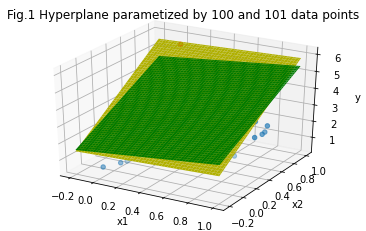

Green hyperplane parametize by 100 data points
yellow hyperplane parametize by 101 data points


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p1 = np.linspace(-0.2,1,100)
p2 = np.linspace(-0.2,1,100)
p1_2d, p2_2d = np.meshgrid(p1,p2)
z1 = regress_coef1[0] + regress_coef1[1]*p1_2d + regress_coef1[2] * p2_2d
z2 = regress_coef_new[0] + regress_coef_new[1]*p1_2d + regress_coef_new[2] * p2_2d
ax.plot_surface(p1_2d, p2_2d, z1, color = 'g')
ax.plot_surface(p1_2d, p2_2d, z2, color = 'y') # add mismeasured data
ax.scatter(x[:,0], x[:,1], y)
ax.scatter(0.1,0.8,6, c = 'r')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Fig.1 Hyperplane parametized by 100 and 101 data points')
plt.show()
print('Green hyperplane parametize by 100 data points')
print('yellow hyperplane parametize by 101 data points')

Text(0.5, 1.0, 'Fig.2 The relationship between x1 and y')

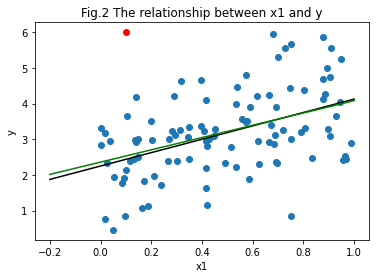

In [ ]:
p1 = np.linspace(-0.2,1,100)
plt.plot(p1, regress_coef2[0] + regress_coef2[1]*p1, c = 'k')
plt.plot(p1, regress_coef_new1[0] + regress_coef_new1[1]*p1, c = 'g')
plt.scatter(x_new[:-1,0], y_new[:-1])
plt.scatter(x_new[-1,0],y_new[-1], c='r')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Fig.2 The relationship between x1 and y')

Text(0.5, 1.0, 'Fig.3 The relationship between x1 and y')

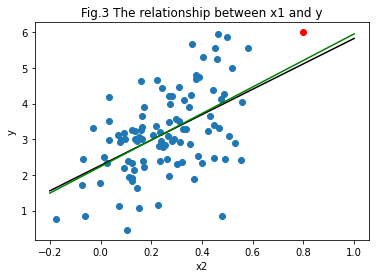

In [ ]:
p2 = np.linspace(-0.2,1,100)
plt.scatter(x_new[:-1,1], y_new[:-1])
plt.scatter(x_new[-1,1],y_new[-1], c='r')
plt.plot(p2, regress_coef3[0] + regress_coef3[2]*p2, c= 'k')
plt.plot(p2, regress_coef_new2[0] + regress_coef_new2[2]*p2, c= 'g')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Fig.3 The relationship between x1 and y')

Studentized residual of the new data point = 1.305373283237972


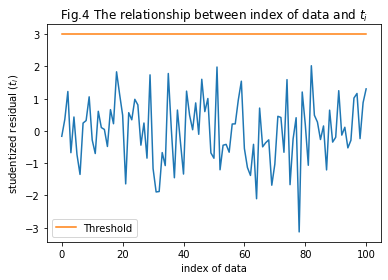

In [ ]:
model_norm_residuals = results_new.get_influence().resid_studentized_internal
plt.plot(model_norm_residuals )
plt.plot(3*np.ones((101)), label = 'Threshold')
plt.xlabel('index of data')
plt.ylabel('studentized residual ($t_{i}$)')
plt.legend()
plt.title('Fig.4 The relationship between index of data and $t_{i}$')
print('Studentized residual of the new data point =', model_norm_residuals[-1])

Text(0.5, 1.0, 'Fig5. The relationship between x1 and x2')

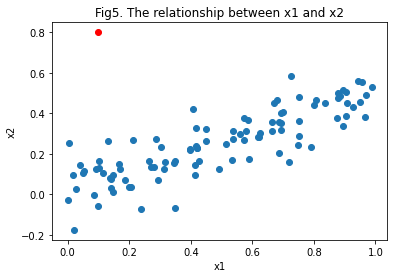

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(0.1, 0.8, c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Fig5. The relationship between x1 and x2')

In [ ]:
print('Hat matrix =', results_new.get_influence().hat_matrix_diag)

Hat matrix = [0.01048521 0.04758496 0.04072398 0.0159217  0.02280187 0.02810788
 0.02226116 0.01351209 0.01073083 0.01089845 0.01034932 0.01464493
 0.02628083 0.02937505 0.03414253 0.02296261 0.01797648 0.01061132
 0.02739342 0.0262662  0.02308046 0.03711023 0.0159286  0.01491942
 0.02966036 0.03408007 0.03333037 0.03687205 0.02097878 0.03127334
 0.04355166 0.01032772 0.0415124  0.0190278  0.01553833 0.01344835
 0.0295451  0.02510121 0.03549213 0.02350608 0.04103832 0.03079074
 0.01530537 0.03953194 0.03017073 0.01043497 0.03059891 0.02231842
 0.0216781  0.04308618 0.07458812 0.0252775  0.0310152  0.01523377
 0.0237527  0.03218909 0.01145785 0.02984027 0.02442113 0.01741464
 0.02744778 0.0155749  0.01689312 0.02414094 0.03213219 0.01027453
 0.01404643 0.01045427 0.04181471 0.01443613 0.03313166 0.02379806
 0.02389515 0.02527897 0.01071239 0.02208307 0.03267516 0.06632462
 0.02648029 0.05283693 0.03035726 0.01239048 0.01821984 0.01289825
 0.01557485 0.03719483 0.01404013 0.04182033 0.01

Text(0.5, 1.0, 'Fig.6 The relationship between index of X and $h_{ii}$')

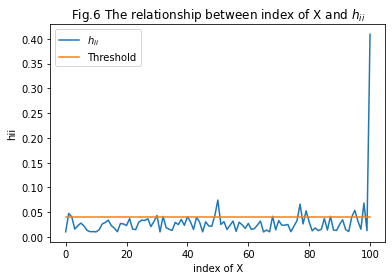

In [ ]:
plt.plot(results_new.get_influence().hat_matrix_diag, label = '$h_{ii}$')
plt.plot(np.ones((len(results_new.get_influence().hat_matrix_diag)))*2*2/101, label = 'Threshold') # thrshold = 2*n / N
plt.xlabel('index of X')
plt.ylabel('hii')
plt.legend()
plt.title('Fig.6 The relationship between index of X and $h_{ii}$')